# Logistic Regression

# Introduction

Logistic Regression is a supervised machine learning techniques used when modeling binary outcomes. It is a type of regression analysis used to predict the probability of a binary outcome based on one or more predictor variables. The outcome variable is typically coded as 0 or 1, where 0 represents the absence of the event and 1 represents the presence of the event.

Read more on logistic regression from my [GitHub repository](<https://github.com/StatisticianLeboo/My-Youtube-Channel/blob/main/Machine%20Learning/Supervised%20Learning/Logistic%20Regression/README.md>)

The data used in this example is from a [Kaggle](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows) repository, and comprises of health and demographic data of 100,000 individuals in the US.  We shall predict the outcome of having diabetes (Yes/No) based on a set of predictors. **Note that outcomes may or may not reflect actual medical scenarios but it a great data for practice.**

# Summary of analysis approach
The methodology used in this example is as follows:
1. Loading the data and required packages
2. Data cleaning
    - Checking for missing data
    - Setting correct variable types
    - Checking for outliers
3. Exploratory data analysis 
4. Splitting the data into training and test sets
5. Building the logistic model
6. Evaluating the model
    ` Making predictions
    - Confusion matrix
    - ROC curve
    - F1 score
    - Accuracy
7. Conclusion and recommendation


In [1]:
# import the data and other packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# read the data
diabetes = pd.read_csv('diabetes_dataset.csv')
# check the first few rows of the dataset
diabetes.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [2]:
diabetes.columns

Index(['year', 'gender', 'age', 'location', 'race:AfricanAmerican',
       'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other',
       'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'hbA1c_level', 'blood_glucose_level', 'diabetes', 'clinical_notes'],
      dtype='object')

Drop the last column on clinical notes as it is not needed for the analysis at this point

In [3]:
# drop the last column
diabetes = diabetes.drop('clinical_notes', axis=1)

rename the race-related columns to replace the : with _

In [4]:
# Rename columns with race, replacing ':' with '_'
diabetes.rename(columns=lambda x: x.replace(":", "_"), inplace=True)

# Exploratory Data Analysis (EDA)

In [5]:
# check the shape of the dataset
diabetes.shape

(100000, 16)

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race_AfricanAmerican  100000 non-null  int64  
 5   race_Asian            100000 non-null  int64  
 6   race_Caucasian        100000 non-null  int64  
 7   race_Hispanic         100000 non-null  int64  
 8   race_Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [7]:
diabetes.describe()

,year,age,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


No missing values in the data

In [8]:
# check for missing values
diabetes.isnull().sum()

year                    0
gender                  0
age                     0
location                0
race_AfricanAmerican    0
race_Asian              0
race_Caucasian          0
race_Hispanic           0
race_Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64

<Axes: >

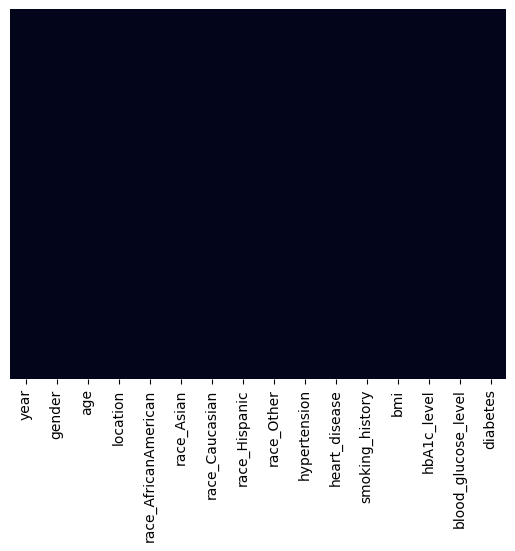

In [9]:
sns.heatmap(diabetes.isnull(), yticklabels=False, cbar =False)

Create a new variable for race such that it is a single variable with multiple levels instead of multiple binary variables

In [10]:
# create a new column for race
# Define a function to determine race based on values
def get_race(row):
    if row["race_AfricanAmerican"] == 1:
        return "African American"
    elif row["race_Asian"] == 1:
        return "Asian"
    elif row["race_Caucasian"] == 1:
        return "Caucasian"
    elif row["race_Hispanic"] == 1:
        return "Hispanic"
    elif row["race_Other"] == 1:
        return "Other"
    else:
        return "Unknown"  # In case no race is marked

# Apply the function to each row
diabetes["race"] = diabetes.apply(get_race, axis=1)

diabetes.head()

,year,gender,age,location,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,African American


In [11]:
diabetes.groupby('race').size()

race
African American    20223
Asian               20015
Caucasian           19876
Hispanic            19888
Other               19998
dtype: int64

In [12]:
# drop the columns'race_AfricanAmerican','race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other'
diabetes = diabetes.drop(['race_AfricanAmerican','race_Asian', 'race_Caucasian', 'race_Hispanic', 'race_Other'], axis=1)
# check the first few rows of the dataset
diabetes.head()    

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,0,0,never,23.75,6.5,90,0,African American


In [13]:
# explore the distribution of the smoking_history
diabetes['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

Reduce the classes of smoking_history based on the 
- current -> Current
- ever or former or not current -> Former/Ever
- No info or never -> Never

In [14]:
def collapse_smoking_hist(smoking_history):
    if smoking_history == "current":
        return "Current"
    elif smoking_history == "ever" or smoking_history == "former" or smoking_history == "never":
        return 'Former/Ever'
    elif smoking_history == "No info" or smoking_history == "never":
        return 'Never'    
    else:
        return smoking_history.title()
        
 # apply the function to the smoking_history column
diabetes['smoking_history'] = diabetes['smoking_history'].apply(collapse_smoking_hist)  
     
diabetes['smoking_history'].value_counts()

smoking_history
Former/Ever    48451
No Info        35816
Current         9286
Not Current     6447
Name: count, dtype: int64

# create variable for bmi class 

| **Category**       | **Adults (CDC & WHO)**       | **Children (CDC & WHO)**          |
|--------------------|----------------------------|----------------------------------|
| **Underweight**    | BMI < 18.5                  | Below the 5th percentile        |
| **Normal Weight**  | BMI 18.5 - 24.9             | 5th to 85th percentile          |
| **Overweight**     | BMI 25 - 29.9               | 85th to 95th percentile         |
| **Obesity**       | BMI ≥ 30                    | 95th percentile or greater      |
| **Severe Obesity** | BMI ≥ 40 (CDC)              | 120% of the 95th percentile or BMI ≥ 35 kg/m² (WHO) |

In [15]:
# Define a function to classify BMI based on age

def bmi_class(age, bmi):
    if age < 18: # children
        # BMI percentile classification for children (based on CDC)
        if bmi < 5:
            return "Underweight"
        elif 5 <= bmi < 85:
            return "Normal"
        elif 85 <= bmi < 95:
            return "Overweight"
        else:
            return "Obese"
    else:
        # Standard adult BMI classification (WHO & CDC)
        if bmi < 18.5:
            return "Underweight"
        elif 18.5 <= bmi < 24.9:
            return "Normal"
        elif 25 <= bmi < 29.9:
            return "Overweight"
        elif 30 <= bmi < 39.9:
            return "Obese"
        else:
            return "Severely Obese"

# Apply function
diabetes["bmi_category"] = diabetes.apply(lambda row: bmi_class(row["age"], row["bmi"]), axis=1)

print(diabetes[["age", "bmi", "bmi_category"]].head())

    age    bmi bmi_category
0  32.0  27.32   Overweight
1  29.0  19.95       Normal
2  18.0  23.76       Normal
3  41.0  27.32   Overweight
4  52.0  23.75       Normal


## Visualization

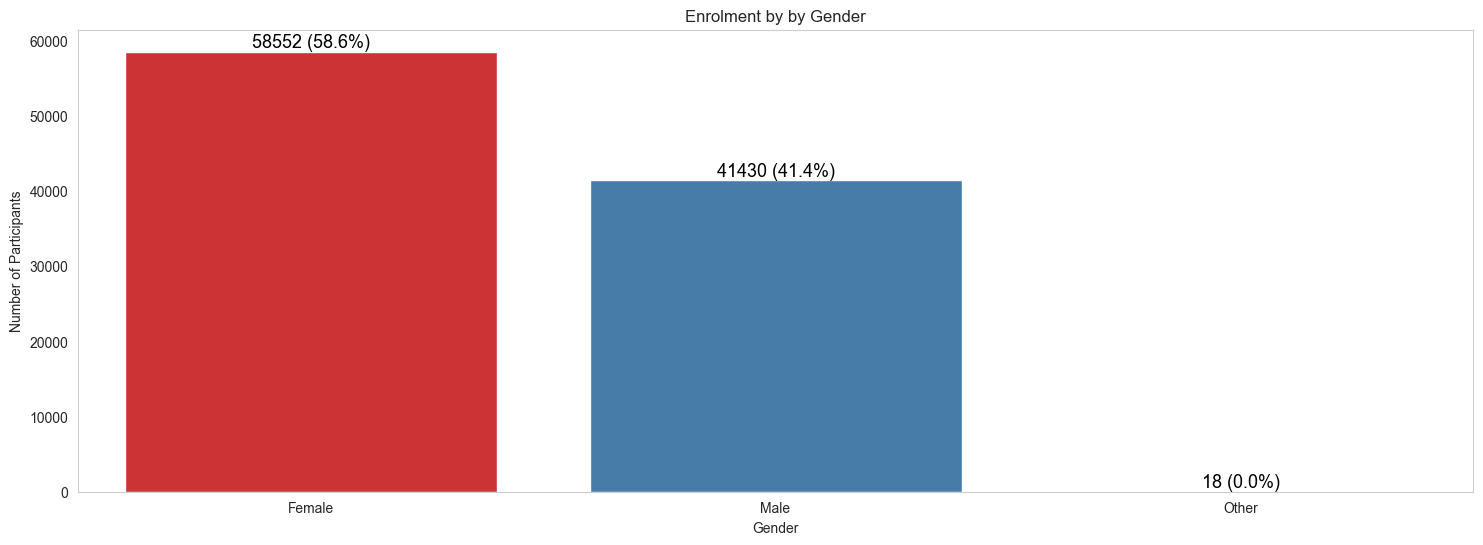

In [16]:
# enrolment by gender
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')

# Order the distribution of gender by their counts
diabetes_gender = diabetes['gender'].value_counts().index

# Create a countplot
sns.countplot(x='gender', data= diabetes, order= diabetes_gender, hue='gender', palette='Set1')
# title
plt.title('Enrolment by by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')

plt.grid(False)


# Add count and percentage on top of each bar
total_count = len(diabetes)
diabetes_gender_counts = diabetes['gender'].value_counts()
for idx, count in enumerate(diabetes_gender_counts):
    percentage = (count / total_count) * 100
    plt.text(idx, count + 10, f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=13, color='black')

Since the other gender is very small, we can drop these values

In [17]:
# drop rows where gender == Other
diabetes = diabetes[diabetes['gender'] != 'Other']
diabetes['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

Distribution of th response variable

In [18]:
diabetes.groupby('diabetes').size()

diabetes
0    91482
1     8500
dtype: int64

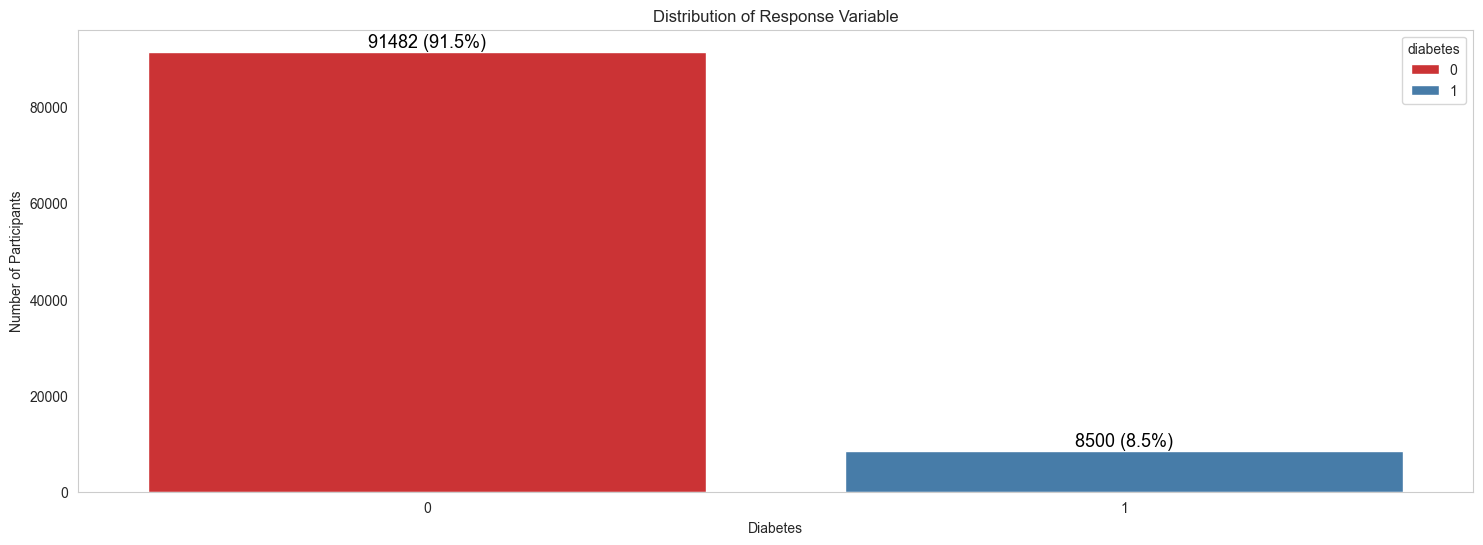

In [19]:
# distribution of response variable
plt.figure(figsize=(18,6))
sns.set_style('whitegrid')


# Order the distribution of gender by their counts
diabetes_response = diabetes['diabetes'].value_counts().index

# Create a countplot
sns.countplot(x='diabetes', data= diabetes, order= diabetes_response, hue='diabetes', palette='Set1')
# title
plt.title('Distribution of Response Variable')
plt.xlabel('Diabetes')
plt.ylabel('Number of Participants')

plt.grid(False)


# Add count and percentage on top of each bar
total_count = len(diabetes)
diabetes_response_counts = diabetes['diabetes'].value_counts()
for idx, count in enumerate(diabetes_response_counts):
    percentage = (count / total_count) * 100
    plt.text(idx, count + 10, f'{count} ({percentage:.1f}%)', ha='center', va='bottom', fontsize=13, color='black')

The two classes are highly skewed - 8.5% are diabetic

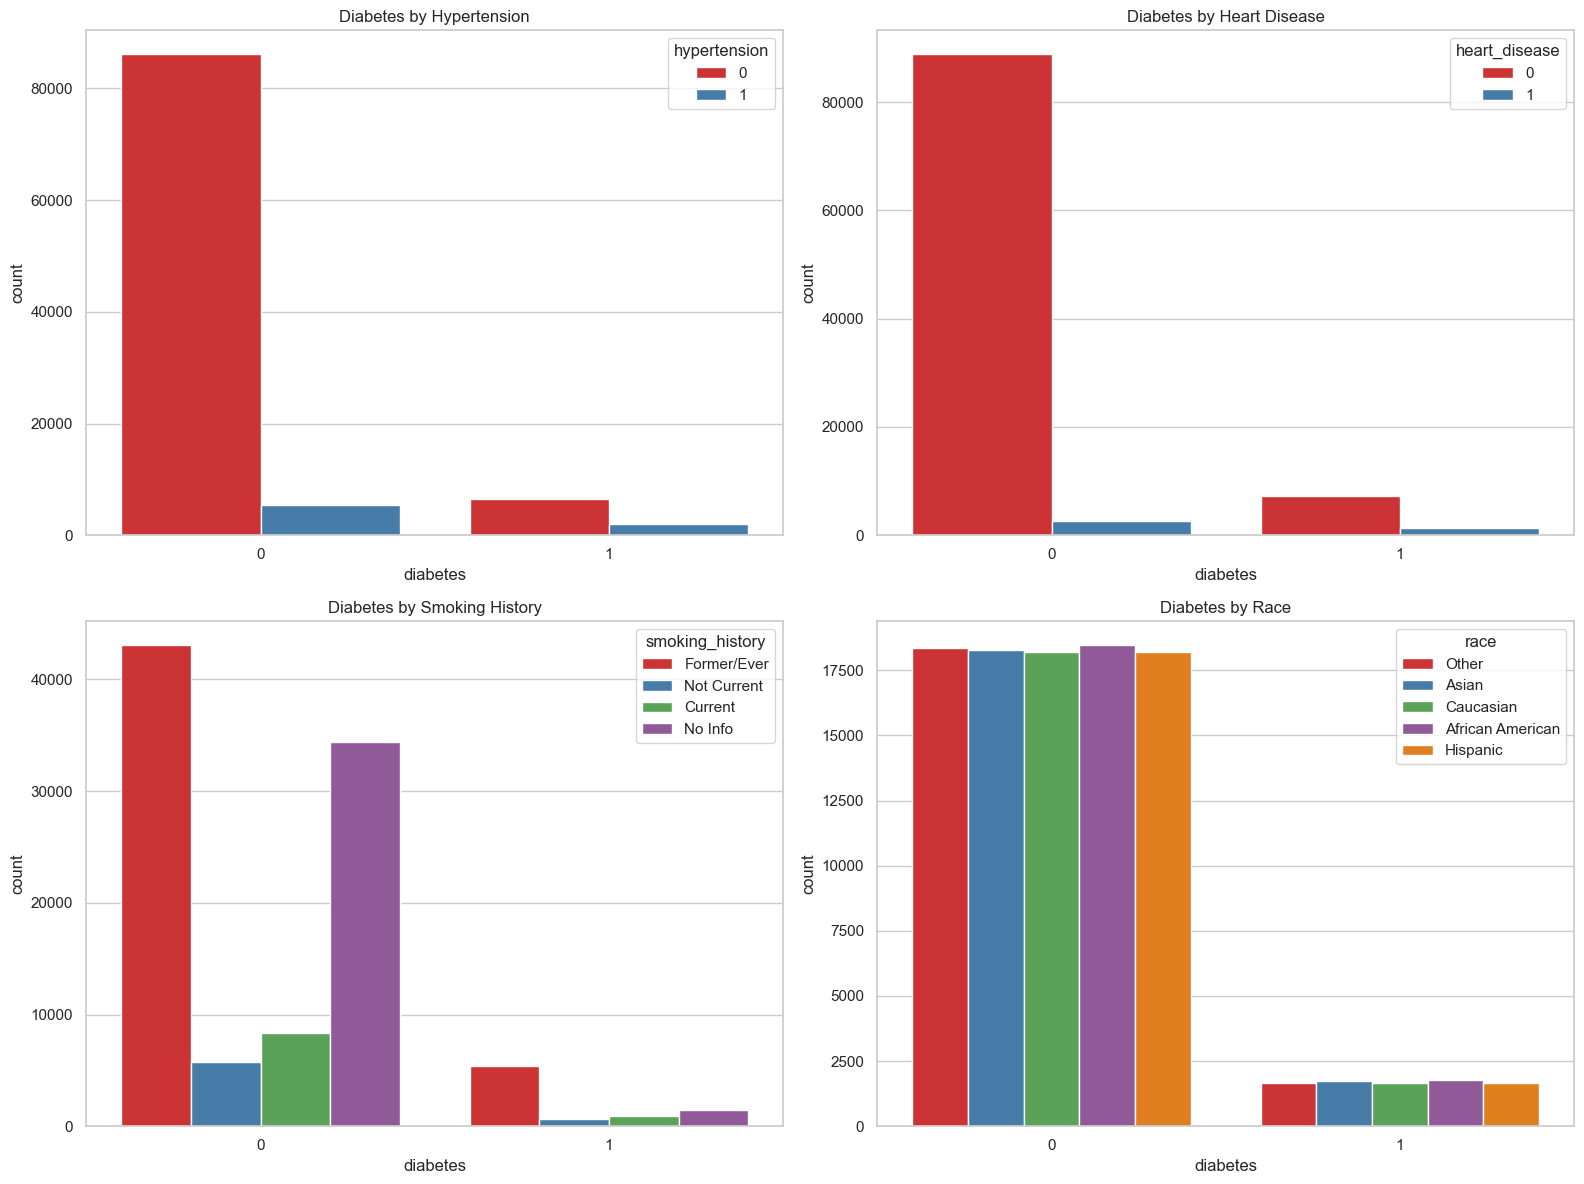

In [20]:
# draw a countplot for the target variable and set hue for each category using subplots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 12))
plt.subplot(2,2,1)
sns.countplot(x='diabetes', data=diabetes, hue='hypertension', palette='Set1')
plt.title('Diabetes by Hypertension')
plt.subplot(2,2,2)
sns.countplot(x='diabetes', data=diabetes, hue='heart_disease', palette='Set1')
plt.title('Diabetes by Heart Disease')
plt.subplot(2,2,3)
sns.countplot(x='diabetes', data=diabetes, hue='smoking_history', palette='Set1')
plt.title('Diabetes by Smoking History')
plt.subplot(2,2,4)
sns.countplot(x='diabetes', data=diabetes, hue='race', palette='Set1')
plt.title('Diabetes by Race')
plt.tight_layout()  # Adjusts spacing for better readability
plt.show()

Text(0, 0.5, 'BMI')

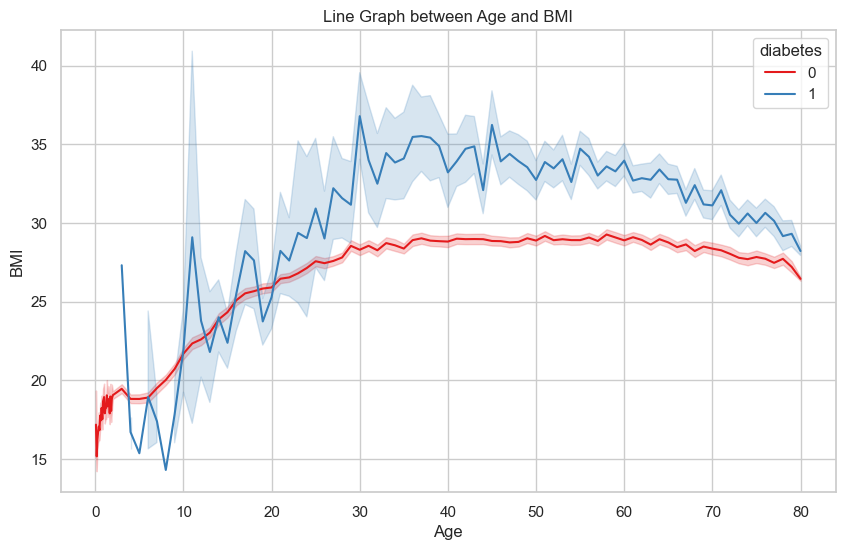

In [21]:
# line graph between age and bmi
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='bmi', data=diabetes, errorbar= ("ci", 95), hue = 'diabetes', palette='Set1')
plt.title('Line Graph between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')

Text(0, 0.5, 'Blood Glucose Level')

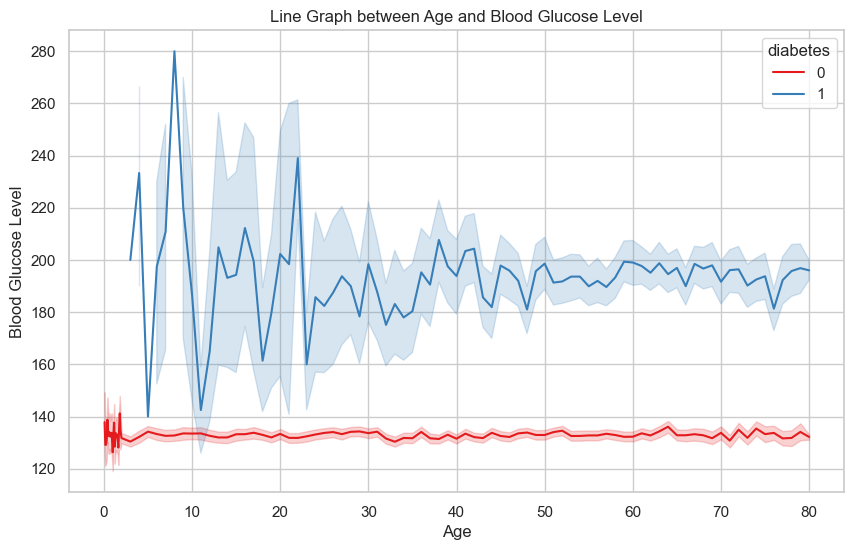

In [22]:
# line graph between age and blood sugar level based on diabetes
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='blood_glucose_level', data=diabetes, hue = 'diabetes', palette='Set1')
plt.title('Line Graph between Age and Blood Glucose Level')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')

Text(0, 0.5, 'Blood Glucose Level')

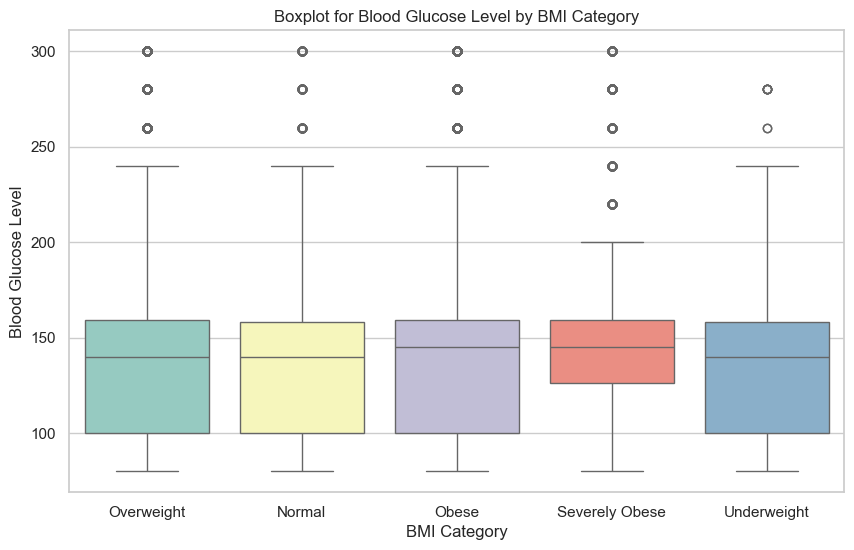

In [23]:
# boxplot for blood glucose level by bmi_category
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi_category', y='blood_glucose_level', data=diabetes, hue = 'bmi_category', palette='Set3')
plt.title('Boxplot for Blood Glucose Level by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Blood Glucose Level')

Text(0, 0.5, 'Blood Glucose Level')

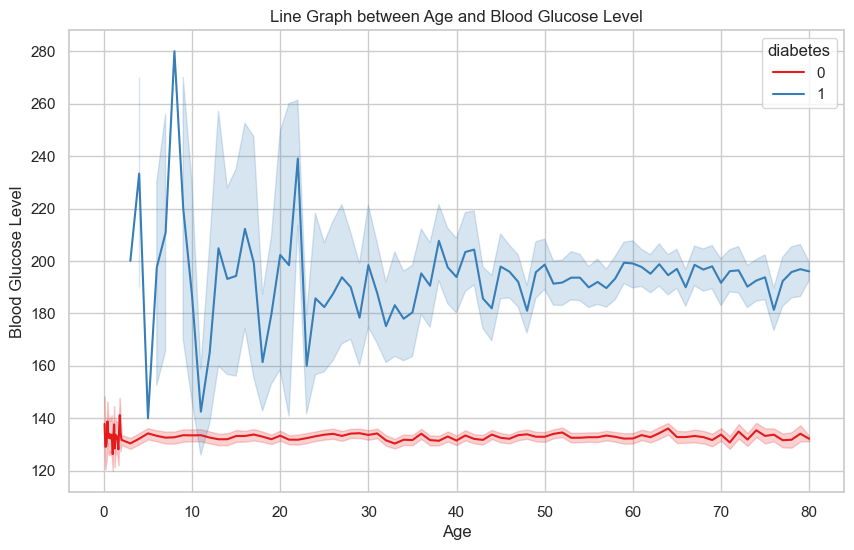

In [24]:
# line graph between age and blood sugar level based on bmi_category
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='blood_glucose_level', data=diabetes, hue = 'diabetes', palette='Set1')
plt.title('Line Graph between Age and Blood Glucose Level')
plt.xlabel('Age')
plt.ylabel('Blood Glucose Level')

## Model Building

Finalized data preparation
Label encode categorical varoables to numeric - also drop bmi as we can focus on bmi_category, location and year as we do not have much use for it

In [25]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 99982 non-null  int64  
 1   gender               99982 non-null  object 
 2   age                  99982 non-null  float64
 3   location             99982 non-null  object 
 4   hypertension         99982 non-null  int64  
 5   heart_disease        99982 non-null  int64  
 6   smoking_history      99982 non-null  object 
 7   bmi                  99982 non-null  float64
 8   hbA1c_level          99982 non-null  float64
 9   blood_glucose_level  99982 non-null  int64  
 10  diabetes             99982 non-null  int64  
 11  race                 99982 non-null  object 
 12  bmi_category         99982 non-null  object 
dtypes: float64(3), int64(5), object(5)
memory usage: 10.7+ MB


In [26]:
diabetes.drop(['year', 'bmi', 'location'], axis=1, inplace=True)
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,hbA1c_level,blood_glucose_level,diabetes,race,bmi_category
0,Female,32.0,0,0,Former/Ever,5.0,100,0,Other,Overweight
1,Female,29.0,0,0,Former/Ever,5.0,90,0,Asian,Normal
2,Male,18.0,0,0,Former/Ever,4.8,160,0,Other,Normal
3,Male,41.0,0,0,Former/Ever,4.0,159,0,Caucasian,Overweight
4,Female,52.0,0,0,Former/Ever,6.5,90,0,African American,Normal


In [27]:
# genreate value counts for each categorical variable
for col in diabetes.select_dtypes(include=['object']).columns:
    print(f"Value counts for {col}:")
    print(diabetes[col].value_counts())
    print("\n")

Value counts for gender:
gender
Female    58552
Male      41430
Name: count, dtype: int64


Value counts for smoking_history:
smoking_history
Former/Ever    48447
No Info        35810
Current         9286
Not Current     6439
Name: count, dtype: int64


Value counts for race:
race
African American    20221
Asian               20013
Other               19996
Hispanic            19885
Caucasian           19867
Name: count, dtype: int64


Value counts for bmi_category:
bmi_category
Overweight        41150
Normal            34231
Obese             18248
Severely Obese     5335
Underweight        1018
Name: count, dtype: int64




We shall still implemnt manual encoding as we did for linear regression in later videos we shall use Label_Encoder() form the sklearn.preprocessing

In [28]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Columns to encode
columns_to_encode = ['gender', 'race', 'smoking_history', 'bmi_category']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('ordinal', OrdinalEncoder(), columns_to_encode)],
    remainder='passthrough'
)

# Fit and transform the data
diabetes_encoded_array = preprocessor.fit_transform(diabetes)

# Convert back to DataFrame with correct column names
encoded_columns = columns_to_encode + [col for col in diabetes.columns if col not in columns_to_encode]
diabetes_encoded = pd.DataFrame(diabetes_encoded_array, columns=encoded_columns)

# Check results
diabetes_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99982 entries, 0 to 99981
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               99982 non-null  float64
 1   race                 99982 non-null  float64
 2   smoking_history      99982 non-null  float64
 3   bmi_category         99982 non-null  float64
 4   age                  99982 non-null  float64
 5   hypertension         99982 non-null  float64
 6   heart_disease        99982 non-null  float64
 7   hbA1c_level          99982 non-null  float64
 8   blood_glucose_level  99982 non-null  float64
 9   diabetes             99982 non-null  float64
dtypes: float64(10)
memory usage: 7.6 MB


In [29]:
diabetes_encoded.head()

,gender,race,smoking_history,bmi_category,age,hypertension,heart_disease,hbA1c_level,blood_glucose_level,diabetes
0,0.0,4.0,1.0,2.0,32.0,0.0,0.0,5.0,100.0,0.0
1,0.0,1.0,1.0,0.0,29.0,0.0,0.0,5.0,90.0,0.0
2,1.0,4.0,1.0,0.0,18.0,0.0,0.0,4.8,160.0,0.0
3,1.0,2.0,1.0,2.0,41.0,0.0,0.0,4.0,159.0,0.0
4,0.0,0.0,1.0,0.0,52.0,0.0,0.0,6.5,90.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:
# split the data into features and target variable
X = diabetes_encoded.drop('diabetes', axis=1)
y = diabetes_encoded['diabetes']
# split the data into training and testing sets 70:30
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3, random_state=42)

In [34]:
# instantiate the model
diabetes_model = LogisticRegression(max_iter=1000)

# fit the model
diabetes_model.fit(Xtrain, ytrain)

LogisticRegression(max_iter=1000)

In [35]:
diabetes_model.coef_

array([[ 0.21875938, -0.02864726, -0.26255193,  0.21796141,  0.0434483 ,
         0.88840524,  0.76869254,  2.34953884,  0.03356176]])

In [36]:
# Get model coefficients
coefficients = diabetes_model.coef_[0]
intercept = diabetes_model.intercept_[0]


# Create a DataFrame for feature coefficients
summary_df = pd.DataFrame({
    "Feature": Xtrain.columns,
    "Coefficient": coefficients,
    "Odds Ratio": np.exp(coefficients)  # Convert coefficients to odds ratios by exponentiating
})

# Create a separate row for the intercept
intercept_df = pd.DataFrame({"Feature": ["Intercept"], "Coefficient": [intercept], "Odds Ratio": [np.exp(intercept)]})

# Append intercept to the summary DataFrame
summary_df = pd.concat([summary_df, intercept_df], ignore_index=True)

# Display the final DataFrame
print(summary_df)

               Feature  Coefficient    Odds Ratio
0               gender     0.218759  1.244532e+00
1                 race    -0.028647  9.717592e-01
2      smoking_history    -0.262552  7.690864e-01
3         bmi_category     0.217961  1.243539e+00
4                  age     0.043448  1.044406e+00
5         hypertension     0.888405  2.431249e+00
6        heart_disease     0.768693  2.156944e+00
7          hbA1c_level     2.349539  1.048074e+01
8  blood_glucose_level     0.033562  1.034131e+00
9            Intercept   -24.549198  2.179812e-11


**Model Intepretation**


Alternatively, you can use the statsmodel library which gives an output like R and STATA

In [39]:
import statsmodels.api as sm

# Add a constant to the independent variables (X) to include the intercept in the model
X_train_sm = sm.add_constant(Xtrain)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(ytrain, X_train_sm)
result = logit_model.fit()

# Print the summary of the model
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.119588
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               diabetes   No. Observations:                69987
Model:                          Logit   Df Residuals:                    69977
Method:                           MLE   Df Model:                            9
Date:                Sun, 18 May 2025   Pseudo R-squ.:                  0.5878
Time:                        18:46:19   Log-Likelihood:                -8369.6
converged:                       True   LL-Null:                       -20306.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -24.5897      0.318    -77.247      0.000     -25.214     -23.966
g

The logistic regression model was fitted using maximum likelihood estimation (MLE) to assess the association between the independent variables and the likelihood of diabetes. The model included 69,987 observations and 9 predictor variables. The pseudo R-squared value is approximately 0.588, indicating a moderately strong model fit. The log-likelihood improved significantly from the null model (LL-Null = -20,306) to the full model (LL = -8,369.6), and the model converged successfully.

Note: Odds ratios greater than 1 indicate a positive association with diabetes, while values below 1 indicate a negative association. For instance, a unit increase in hbA1c_level multiplies the odds of having diabetes by approximately 10.55. Variables such as smoking_history and race show a slight negative effect on diabetes risk.

## Model Evaluation

In [40]:
# evaluate the model performance
y_pred = diabetes_model.predict(Xtest)
# print confusion matrix
print(confusion_matrix(ytest, y_pred))

[[27188   236]
 [  974  1597]]


In [41]:
# print the classification report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     27424
         1.0       0.87      0.62      0.73      2571

    accuracy                           0.96     29995
   macro avg       0.92      0.81      0.85     29995
weighted avg       0.96      0.96      0.96     29995



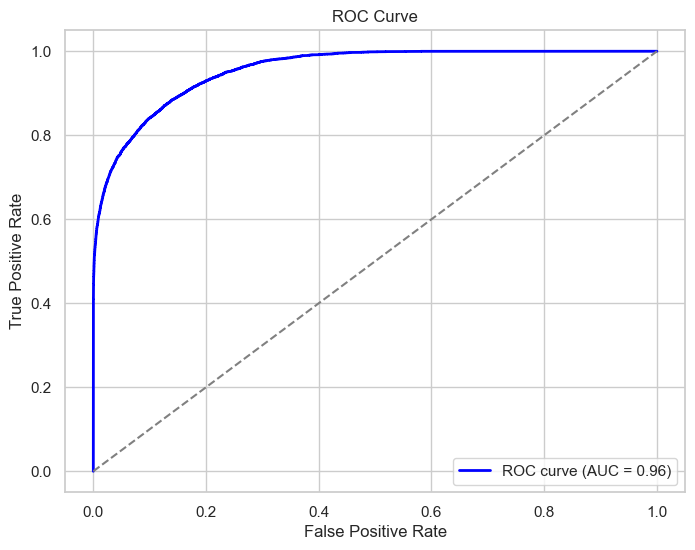

In [42]:
# plot the auc-roc curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (1)
y_prob = result.predict(X_train_sm)  # Use .predict() from statsmodels

# Compute ROC curve
fpr, tpr, _ = roc_curve(ytrain, y_prob)

# Compute AUC score
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Reference line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()